# Ich habe zwei Wege ausprobiert

# 1. mit scipy (mehr oder weniger so wie ich es mit IBM SPSS machen würde)
Dokumentiert ab Zeile 9
# 2. mit sklearn
Dokumentiert ab Zeile 19

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import linregress, t
import seaborn as sns
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm

#viel hilft viel

# Import csv file

In [2]:
df_candy = pd.read_csv("/Users\Lenovo\Documents\candy-data.csv")
df_candy.head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


# Get to know my data

In [3]:
# Largest values for DV "winpercent"
df_candy.sort_values(by="winpercent", ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [4]:
# Smallest values for DV "winpercent"
df_candy.sort_values(by="winpercent").head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


The average is 50.316763811764716
The median is 47.829754


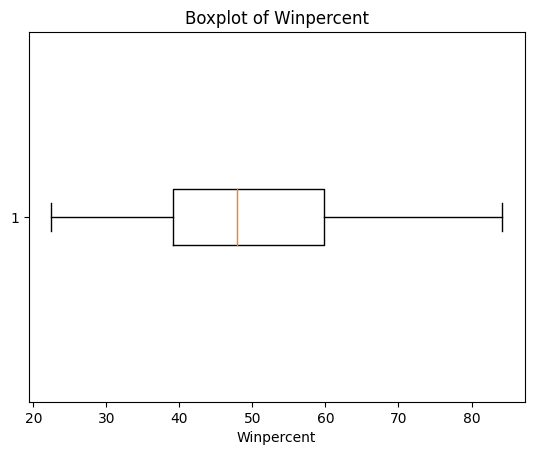

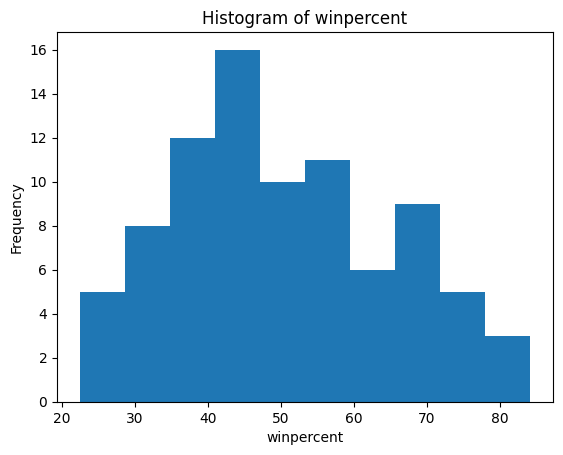

In [5]:
# Average of DV "winpercent"
print("The average is " + str(np.mean(df_candy["winpercent"])))

# Median of DV "winpercent"
print("The median is " + str(np.median(df_candy["winpercent"])))

# Check boxplot DV "winpercent"
plt.boxplot(df_candy["winpercent"], vert = 0)
plt.title("Boxplot of Winpercent")
plt.xlabel("Winpercent")
plt.show()

# Inspect histogram of DV "winpercent" 
plt.hist(df_candy["winpercent"])
plt.title("Histogram of winpercent")
plt.xlabel("winpercent")
plt.ylabel("Frequency")
plt.show()

Ok, now let me look at the IVs:

The average is 0.4786470514588235
The median is 0.465


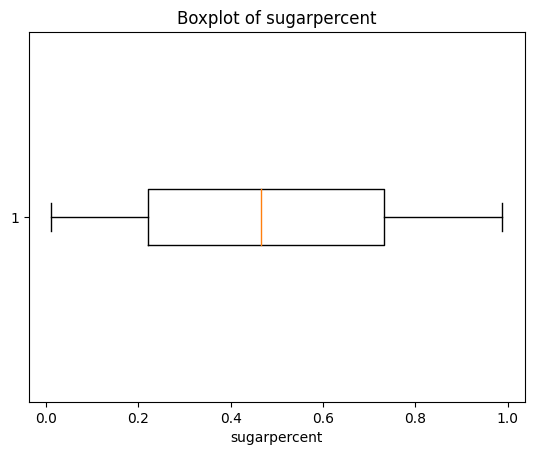

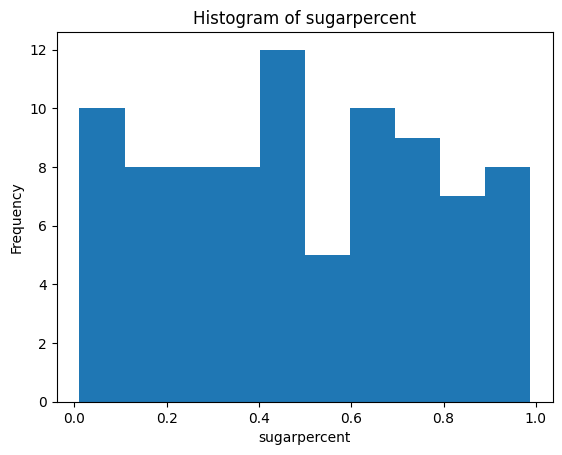

In [6]:
# Average of IV "sugarpercent"
print("The average is " + str(np.mean(df_candy["sugarpercent"])))

# Median of IV "sugarpercent"
print("The median is " + str(np.median(df_candy["sugarpercent"])))

# Check boxplot IV "sugarpercent" 
plt.boxplot(df_candy["sugarpercent"], vert = 0)
plt.title("Boxplot of sugarpercent")
plt.xlabel("sugarpercent")
plt.show()

# Inspect histogram of IV "sugarpercent"
plt.hist(df_candy["sugarpercent"])
plt.title("Histogram of sugarpercent")
plt.xlabel("sugarpercent")
plt.ylabel("Frequency")
plt.show()

The average is 0.46888235249411764
The median is 0.465


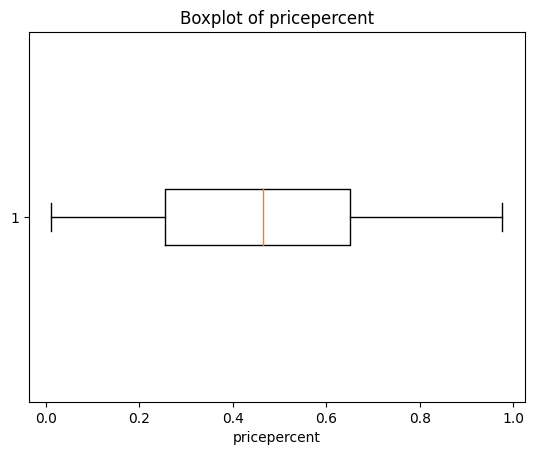

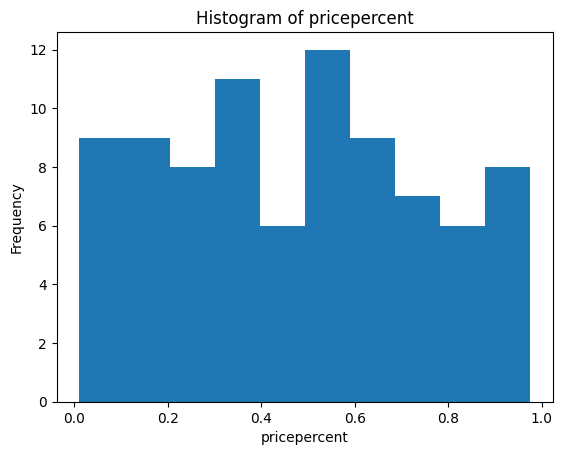

In [7]:
# Average of IV "pricepercent"
print("The average is " + str(np.mean(df_candy["pricepercent"])))

# Median of IV "pricepercent"
print("The median is " + str(np.median(df_candy["pricepercent"])))

# Check boxplot IV "pricepercent"
plt.boxplot(df_candy["pricepercent"], vert = 0)
plt.title("Boxplot of pricepercent")
plt.xlabel("pricepercent")
plt.show()

# Inspect histogram of IV "pricepercent"
plt.hist(df_candy["pricepercent"])
plt.title("Histogram of pricepercent")
plt.xlabel("pricepercent")
plt.ylabel("Frequency")
plt.show()

now the dichotomous IVs:

In [8]:
# Find out proportion of my dichotomous IVs
print("How high is the proportion of candies that have the following characteristics?")
print()
print("chocolate candy: " + str(np.mean(df_candy["chocolate"])))
print("fruity candy: " + str(np.mean(df_candy["fruity"])))
print("caramel candy: " + str(np.mean(df_candy["caramel"])))
print("peanutyalmondy candy: " + str(np.mean(df_candy["peanutyalmondy"])))
print("nougat: " + str(np.mean(df_candy["nougat"])))
print("crispedricewafer: " + str(np.mean(df_candy["crispedricewafer"])))
print("hard: " + str(np.mean(df_candy["hard"])))
print("bar: " + str(np.mean(df_candy["bar"])))
print("pluribus: " + str(np.mean(df_candy["pluribus"])))

# Maybe I could have solved this with a loop, but time is too short to experiment... 

How high is the proportion of candies that have the following characteristics?

chocolate candy: 0.43529411764705883
fruity candy: 0.4470588235294118
caramel candy: 0.16470588235294117
peanutyalmondy candy: 0.16470588235294117
nougat: 0.08235294117647059
crispedricewafer: 0.08235294117647059
hard: 0.17647058823529413
bar: 0.24705882352941178
pluribus: 0.5176470588235295


It's time to look at the correlations in my sample:

# Check assumption: No Multicolinearity
look at correlation coefficients

In [9]:
df_candy.corr(numeric_only=True)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


In [35]:
# The correlation coefficients were not extremely high (highest "chocolate" & "fruity" = -0.742); therefore, we can assume no multicolinearity

# Check assumption: Linear relationship DV and IVs
Plot some scatterplots to visualize the correlations (makes little sense for the dichotomous variables):

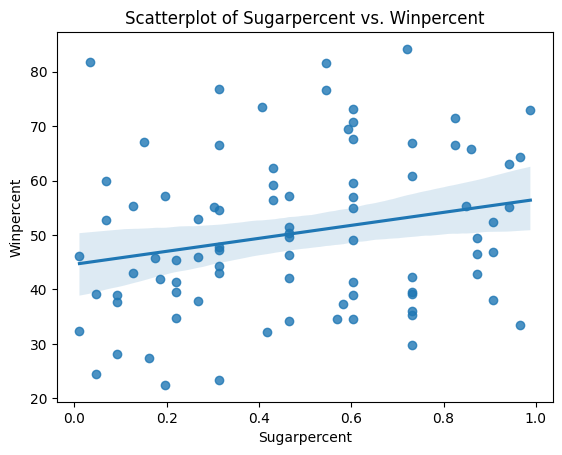

In [11]:
# Create a scatterplot of sugarpercent vs. winpercent
sns.regplot(x="sugarpercent", y="winpercent", data=df_candy)

# Add axis labels and a title
plt.xlabel("Sugarpercent")
plt.ylabel("Winpercent")
plt.title("Scatterplot of Sugarpercent vs. Winpercent")

# Show the plot
plt.show()

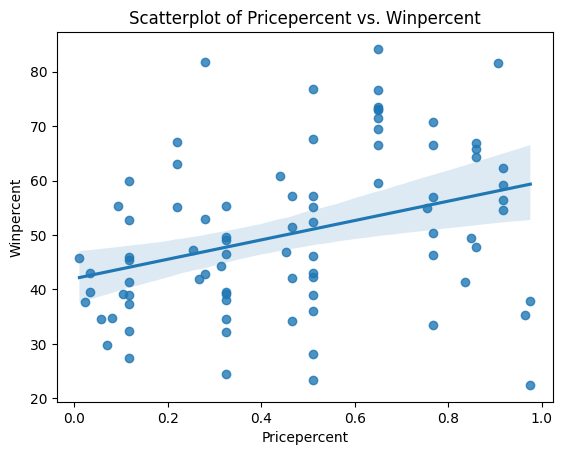

In [12]:
# Create a scatterplot of sugarpercent vs. winpercent
sns.regplot(x="pricepercent", y="winpercent", data=df_candy)

# Add axis labels and a title
plt.xlabel("Pricepercent")
plt.ylabel("Winpercent")
plt.title("Scatterplot of Pricepercent vs. Winpercent")

# Show the plot
plt.show()

In [13]:
# Scatterplots indicate linear relationship between IVs and DV

# Multiple Linear Regression Analysis

In [14]:
# Clarify my Criterion and my Predictors

y_win = df_candy["winpercent"]
x1_choc = df_candy["chocolate"]
x2_fruity = df_candy["fruity"]
x3_caramel = df_candy["caramel"]
x4_peanuty = df_candy["peanutyalmondy"]
x5_nougat = df_candy["nougat"]
x6_crisped = df_candy["crispedricewafer"]
x7_hard = df_candy["hard"]
x8_bar = df_candy["bar"]
x9_pluribus = df_candy["pluribus"]
x10_sugar = df_candy["sugarpercent"]
x11_price = df_candy["pricepercent"]

mlr_candy = pd.concat([x1_choc, x2_fruity, x3_caramel, x4_peanuty, x5_nougat, x6_crisped, x7_hard, x8_bar, x9_pluribus, x10_sugar, x11_price, y_win], axis=1, keys=["x1_choc", "x2_fruity", "x3_caramel", "x4_peanuty", "x5_nougat", "x6_crisped", "x7_hard", "x8_bar", "x9_pluribus", "x10_sugar", "x11_price", "y_win"])
mlr_candy.head(3)

,x1_choc,x2_fruity,x3_caramel,x4_peanuty,x5_nougat,x6_crisped,x7_hard,x8_bar,x9_pluribus,x10_sugar,x11_price,y_win
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


In [15]:
fit_mlr_candy = smf.ols("y_win ~ x1_choc + x2_fruity + x3_caramel + x4_peanuty + x5_nougat + x6_crisped + x7_hard + x8_bar + x9_pluribus + x10_sugar + x11_price", mlr_candy).fit()
fit_mlr_candy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_win   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           9.50e-09
Time:                        03:47:05   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.5340      4.320      7.994      0.000      25.924      43.144
x1_choc        19.7481      3.899      5.065      0.000      11.978      27.518
x2_fruity       9.4223      3.763      2.504      0.015       1.923      16.922
x3_caramel      2.2245      3.657      0.608      0.545      -5.065       9.514
x4_peanuty     10.0707      3.616      2.785      0.007       2.864      17.277
x5_nougat       0.8043      5.716      0.141      0.888     -10.588      12.197
x6_crisped      8.9190      5.268      1.693      0.095      -1.580      19.418
x7_hard        -6.1653      3.455     -1.784      0.079     -13.051       0.721
x8_bar          0.4415      5.061      0.087      0.931      -9.645      10.528
x9_pluribus    -0.8545      3.040     -0.281      0.779      -6.913       5.204
x10_sugar       9.0868      4.659      1.950      0.055      -0.200      18.373
x11_price      -5.9284      5.513     -1.075      0.286     -16.916       5.060
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.000
Skew:                          -0.104   Prob(JB):                        0.606
Kurtosis:                       2.511   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Notes to myself:
# Rsquared=0.540 (probably positively biased), adjusted Rsquared=0.471 (more accurate)
# adjusted Rsquared=0.471 says that adding all my IVs to the model explains 47.1% of variation in my DV; that's a good effect size
# Prob(F-statistic) = p = 9.5e^-9 =0.00117239313, thats significant using alpha = 0.05

In [17]:
regression_coefficients_smf = fit_mlr_candy.params
print(regression_coefficients_smf)

Intercept      34.533978
x1_choc        19.748067
x2_fruity       9.422322
x3_caramel      2.224481
x4_peanuty     10.070688
x5_nougat       0.804331
x6_crisped      8.918970
x7_hard        -6.165327
x8_bar          0.441540
x9_pluribus    -0.854500
x10_sugar       9.086763
x11_price      -5.928361
dtype: float64


# Check assumption: Independence of observations
looking at Durban-Watson score

In [18]:
# Durban-Watson = 1.728
# Theoretically the Durban-Watson score can range from 0-4. A Score close to 2 is desirable.
# 1.728 is close to 2; therefore indicates independence of observations

# ^^that was more or less how I would have done it with IBM SPSS
# 
# Now lets do this with sklearn

In [19]:
X_train = df_candy[["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus", "sugarpercent", "pricepercent"]].values
print(X_train)

[[1.         0.         1.         0.         0.         1.
  0.         1.         0.         0.73199999 0.86000001]
 [1.         0.         0.         0.         1.         0.
  0.         1.         0.         0.60399997 0.51099998]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.011      0.116     ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.011      0.51099998]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.90600002 0.51099998]
 [1.         0.         0.         1.         0.         0.
  0.         1.         0.         0.465      0.76700002]
 [1.         0.         1.         1.         1.         0.
  0.         1.         0.         0.60399997 0.76700002]
 [0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.31299999 0.51099998]
 [0.         0.         0.         0.         0.        

In [20]:
y_train = df_candy["winpercent"].values
print(y_train)

[66.971725 67.602936 32.261086 46.116505 52.341465 50.347546 56.914547
 23.417824 38.010963 34.517681 38.975037 36.017628 24.524988 42.272076
 39.460556 43.088924 39.185505 46.783348 57.11974  34.158958 51.41243
 42.178772 55.375454 62.284481 56.490501 59.236122 28.127439 57.21925
 76.7686   41.389557 39.141056 52.911392 71.46505  66.574585 46.411716
 55.064072 73.099556 60.800701 64.35334  47.829754 54.526451 55.354046
 70.735641 66.47068  22.445341 39.4468   46.296597 69.483788 37.722336
 41.265511 37.348522 81.866257 84.18029  73.43499  72.887901 35.290756
 65.716286 29.703691 42.849144 34.722    63.08514  55.103695 37.887188
 45.995827 76.673782 59.529251 59.863998 52.825947 67.037628 34.578991
 33.43755  32.230995 27.303865 54.861111 48.982651 43.068897 45.736748
 49.653503 47.173229 81.642914 45.466282 39.011898 44.375519 41.904308
 49.524113]


In [21]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [22]:
#predict the "winpercent" of a candy like "100 Grand" (real rating = 66.97) which contains "chocolate", "caramel", "crispedricewafer", "bar", and 0.73 "sugarpercent" and 0.86 "pricepercent":
predicted_winpercent = regr.predict([[1, 0, 1, 0, 0, 1, 0, 1, 0, 0.73, 0.86]])
print(predicted_winpercent)

[67.40198272]


In [23]:
#predict the "winpercent" of a candy without any characteristics - aka the Intercept of a regression equation
intercept_equation = regr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00, 0.00]])
print(intercept_equation)

[34.53397841]


In [24]:
sklearn_y_predictions = regr.predict(X_train)
print(sklearn_y_predictions)

[67.4201561  57.98692801 33.94624288 31.60454024 49.15951525 64.47256535
 68.76443708 43.56493145 39.9853688  49.74246894 57.98692801 46.72391869
 41.59307463 46.72391869 44.24092    44.05425552 42.5157669  42.48353399
 44.57045761 35.14813554 44.57045761 44.57045761 54.03022711 62.10762775
 53.18865794 53.18865794 34.75215083 52.18824556 63.45731941 45.26769839
 37.59241548 44.72845318 67.13545018 57.06476171 49.09874057 55.36683694
 59.38143854 61.78950033 60.61840185 52.46935129 62.19619497 42.71533185
 65.73562512 61.93965865 39.10581241 43.17417136 45.52882898 65.0273212
 34.38819552 37.46284036 47.69351996 63.00767092 67.03583998 63.32809654
 69.47109198 38.7216157  58.36825248 33.75660577 43.20611857 54.9464364
 50.3482051  50.3482051  50.06763063 38.6749501  68.92509504 77.56676622
 43.04109763 43.04109763 43.16966253 41.76299765 40.12563279 38.63000934
 44.74066614 44.11429256 61.10072805 54.09680951 54.94343052 57.02221281
 44.43422546 65.45731361 45.26769839 37.94835302 44.0

In [25]:
print("Mean absolute error: " + str(mean_absolute_error(sklearn_y_predictions, y_train)))
print("Mean squared error: " + str(mean_squared_error(sklearn_y_predictions, y_train)))

Mean absolute error: 7.955402203016126
Mean squared error: 98.37927075848414


In [26]:
# Find out regression coefficients for regression equation, explanation: 1.00 increase in characteristic explains the following increase in "winpercent":
regression_coefficients_sklearn = regr.coef_
print(regression_coefficients_sklearn)

[19.74806698  9.42232207  2.22448136 10.07068847  0.8043306   8.91896981
 -6.1653265   0.44154009 -0.85449954  9.08676286 -5.92836143]


In [27]:
# This looks good, but the Intercept of my regression equation is missing
# predict the "winpercent" of a candy without any characteristics - aka the Intercept of a regression equation
intercept_equation = regr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00, 0.00]])
print(intercept_equation)

[34.53397841]


In [28]:
# Now I have to add the Intercept on the first place of my np.array containing the other equation values
regression_coefficients_sklearn = np.insert(regression_coefficients_sklearn, 0, regr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00, 0.00]]))
print(regression_coefficients_sklearn)

[34.53397841 19.74806698  9.42232207  2.22448136 10.07068847  0.8043306
  8.91896981 -6.1653265   0.44154009 -0.85449954  9.08676286 -5.92836143]


In [29]:
# note to myself: ok interesting. That looks exactly like the values I got through my "IBM SPSS approach"
# Lets compare both equations to each other

In [30]:
# Convert the my "IBM SPSS approach equation" to a NumPy array
np_regression_coefficients_smf = regression_coefficients_smf.to_numpy()

print(np_regression_coefficients_smf)

[34.53397841 19.74806698  9.42232207  2.22448136 10.07068847  0.8043306
  8.91896981 -6.1653265   0.44154009 -0.85449954  9.08676286 -5.92836143]


In [31]:
# Now lets see, if there are any differences between the sklearn-equation and the "IBM SPSS approach equation":
regression_coefficients_sklearn - np_regression_coefficients_smf

array([ 1.42108547e-14, -2.13162821e-14, -8.88178420e-15,  3.55271368e-15,
        2.13162821e-14,  1.39888101e-14, -1.77635684e-15,  5.32907052e-15,
       -1.74860126e-14,  1.22124533e-15,  1.77635684e-15,  1.42108547e-14])

In [32]:
# note to myself: those are nearly the EXACT SAME

# Fazit: theoretisch stehen die Vorhersagen zum Erfolg einer neuen Süßigkeit